### Team Information And Names
**Interactive-Visual Data Analysis (IVDA), Fall 2024**

**Team Name:** EastDataViz  

**Team Members:**  
- **Tatsuya Sato** (Student ID: 24-746-224)  
- **Jixian Tang** (Student ID: 23-754-328)  
- **Yanyang Gong** (Student ID: 23-744-063)  
- **Lihui Zhou** (Student ID: 24-744-807)  

**GitHub Repository Link:**  
[IVDA_T3_EASTDATAVIS_FRONTEND](https://github.com/YanYang-G0001/IVDA_T3_EASTDATAVIS_FRONTEND)  


---

### Task List  
#### Task 1: **Cross-Group Comparison and High-Risk Group Identification**  
This task provides an overview of the distribution of positive diabetes cases across different subgroups and allows users to identify high-risk groups interactively using the tool.  

#### Task 2: **Scenario Simulation (What-If Analysis)**  
This task helps users assess the impact of changes in specific variables on diabetes risk.  

#### Task 3: **Individual Assessment**  
This task enables users to predict an individual's likelihood of developing diabetes based on input values for various factors.  

---

### Member Contributions  
- **Lihui Zhou:**  
Designed front-end visualizations to support the tasks, implemented front-end and back-end features, defined the required datasets, and created presentation videos.  

- **Yanyang Gong:**  
Designed front-end visualizations to support the tasks, implemented front-end and back-end features, defined the required datasets, and created presentation videos.  

- **Tatsuya Sato:**  
Conducted data analysis and preprocessing, defined the task framework, authored documentation.  

- **Jixian Tang:**  
Conducted data analysis and preprocessing, assisted with back-end implementation, optimized data proccessing logic, and participated in task model design and testing.  

# Peoblem of the original UCI heart diease dataset

## Data Quality Issue in Attribute/Feature `dm`

As we declared in our meeting to you, of all the 76 attributes, only 1 dm is related to diabetes. The `dm` attribute is expected to have values of either 0 or 1. However, a significant number of entries in the dataset have a value of -9. According to the official documentation provided by the dataset’s author, this dataset has been primarily used for heart disease analysis over the years, and the `dm` attribute has never been utilized in any analysis. As a result, there is no explanation available for the meaning of `dm` values being -9.

This lack of explanation makes it impossible for us to **impute** a meaningful value for -9. Therefore, the data quality for using this dataset in diabetes-related analysis is extremely poor. Thus this one is **abandoned**.

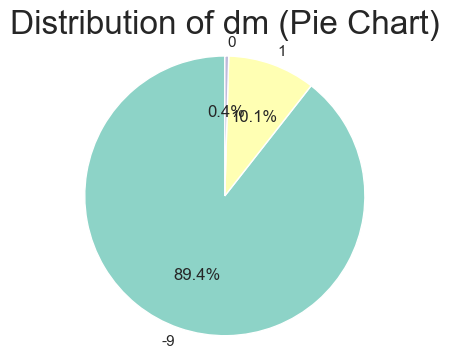

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dm_distribution(file_path):
    data = pd.read_csv(file_path)
    dm_counts = data["dm"].value_counts()
    sns.set(style="whitegrid")
    plt.figure(figsize=(4, 4))
    plt.pie(dm_counts, labels=dm_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(dm_counts)))
    plt.title("Distribution of dm (Pie Chart)", fontsize=24)
    plt.axis('equal')
    plt.show()

file_path = "merged_all_data.csv"
visualize_dm_distribution(file_path)



# Data Preprocessing for Pima Indians diabetes dataset (PIDD)
This dataset contains the following attributes and data types:

- **Pregnancies**: Integer (Number of pregnancies)  
- **Glucose**: Integer (Blood glucose level)  
- **Blood pressure**: Integer  
- **Skin thickness**: Integer  
- **Insulin**: Integer (Insulin level)  
- **Body mass index**: Float (BMI)  
- **Diabetes pedigree function**: Float  
- **Age**: Integer  
- **Outcome**: Integer (Presence of diabetes: 1 for positive, 0 for negative)  
  
First, we check the number of missing values for each attribute.

In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 1 _ Pima Indians diabetes dataset (PIDD).xlsx'
df = pd.read_excel(file_path)

df.info()
initial_count = len(df)
missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood pressure              768 non-null    int64  
 3   Skin thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
Blood pressure,0
Skin thickness,0
Insulin,0
Body mass index,0
Diabetes pedigree function,0
Age,0
Outcome,0


##Visualization of Distribution and Outlier Detection
Next, we will visualize the distribution of each attribute.

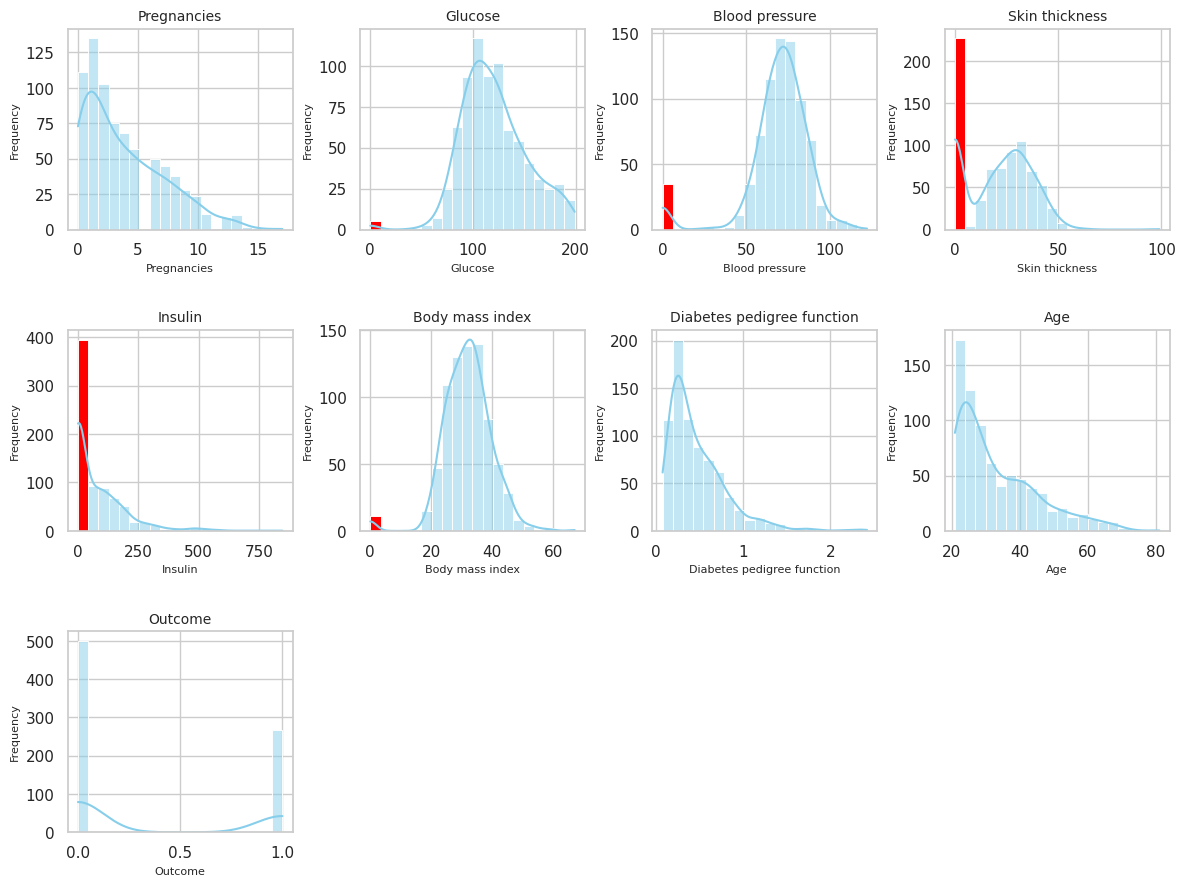

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 1 _ Pima Indians diabetes dataset (PIDD).xlsx'
df = pd.read_excel(file_path)

columns_to_check1 = ['Glucose', 'Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index']

num_features = len(df.columns)
ncols = 4
nrows = num_features // ncols + (num_features % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 3))

for i, column in enumerate(df.columns):
    ax = axes[i // ncols, i % ncols]
    hist = sns.histplot(df[column], ax=ax, kde=True, color='skyblue', bins=20)
    if column in columns_to_check1:
        for bar in hist.patches:
            if bar.get_x() <= 0 and bar.get_x() + bar.get_width() > 0:
                bar.set_facecolor('red')

    ax.set_title(f'{column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

for j in range(len(df.columns), len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout(pad=1.0)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


As noted, there were no missing values. However, there are items where the values for Glucose, Blood pressure, Skin thickness, Insulin, and Body mass index are set to 0, which are not realistic values, so these will be excluded as missing values.

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 392 non-null    int64  
 1   Glucose                     392 non-null    object 
 2   Blood pressure              392 non-null    object 
 3   Skin thickness              392 non-null    object 
 4   Insulin                     392 non-null    object 
 5   Body mass index             392 non-null    object 
 6   Diabetes pedigree function  392 non-null    float64
 7   Age                         392 non-null    int64  
 8   Outcome                     392 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 30.6+ KB


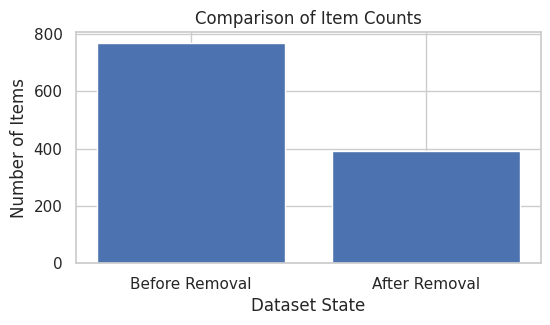

In [ ]:
import matplotlib.pyplot as plt
columns_to_replace = ['Glucose', 'Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index', 'Diabetes pedigree function']
df[columns_to_replace] = df[columns_to_replace].map(lambda x: pd.NA if x == 0 else x)
df = df.dropna(subset=columns_to_replace)
final_count = len(df)
counts = [initial_count, final_count]
labels = ['Before Removal', 'After Removal']
df.info()

plt.figure(figsize=(6, 3))
plt.bar(labels, counts)
plt.xlabel('Dataset State')
plt.ylabel('Number of Items')
plt.title('Comparison of Item Counts')
plt.show()

The number of item decreased from 768 to 392.
  


After excluding invalid values, the distributions appear reasonable at first glance. However, as they might still contain outliers, we will visualize them using a boxplot.

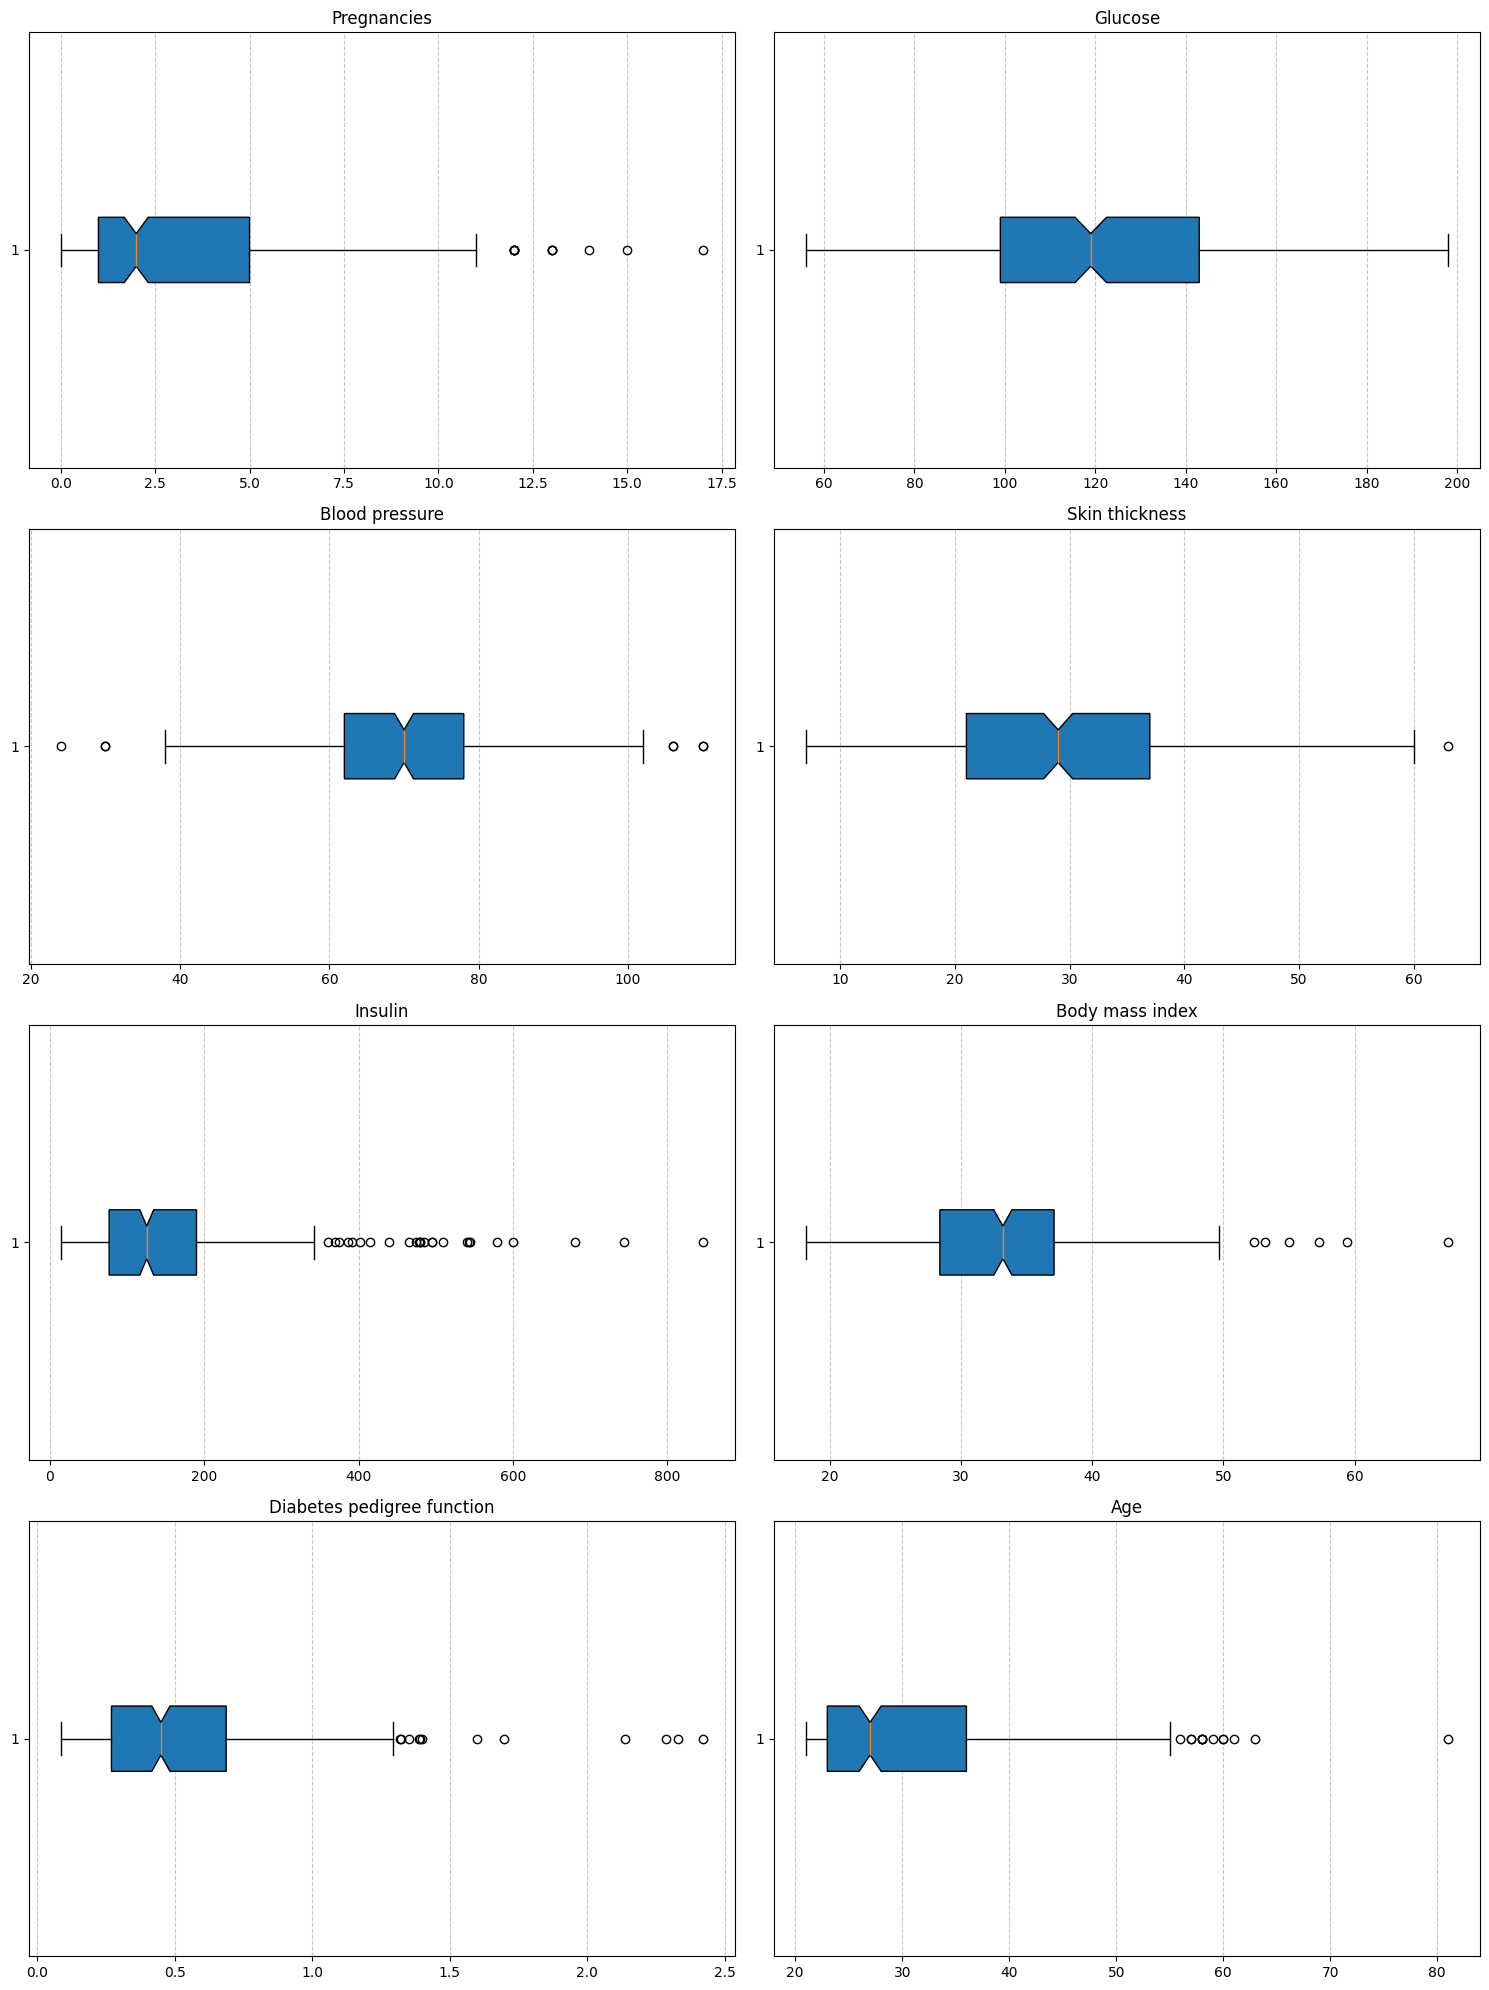

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

axes = axes.flatten()

df_boxplot = df.drop(columns=["Outcome"])
columns_to_plot = df_boxplot.columns

for i, column in enumerate(columns_to_plot):
    if i < len(axes):
        axes[i].boxplot(df_boxplot[column].dropna(), vert=False, patch_artist=True, notch=True)
        axes[i].set_title(f'{column}')
        axes[i].grid(axis='x', linestyle='--', alpha=0.7)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Based on the boxplot, some attributes, particularly insulin, may contain many outliers. However, since the original data lacks descriptions or numerical units, the validity of these values cannot be discussed here. They may, however, be excluded later if inconsistencies arise during the modeling phase.

# Data Preprocessing for Early-stage diabetes risk prediction dataset (ESDRPD)
This dataset contains the following attributes and data types. Since most of the attributes are binary data such as "yes" or "no," we will assign numbers as follows:  
-- **Age**: Integer  
-- **Gender**: Integer (1 for Male, 0 for Female)  
-- **Polyuria**: Integer (1 for Yes, 0 for No)  
-- **Polydipsia**: Integer (1 for Yes, 0 for No)  
-- **Sudden weight loss**: Integer (1 for Yes, 0 for No)  
-- **Weakness**: Integer (1 for Yes, 0 for No)  
-- **Polyphagia**: Integer (1 for Yes, 0 for No)  
-- **Genital thrush**: Integer (1 for Yes, 0 for No)  
-- **Visual blurring**: Integer (1 for Yes, 0 for No)  
-- **Itching**: Integer (1 for Yes, 0 for No)  
-- **Irritability**: Integer (1 for Yes, 0 for No)  
-- **Delayed healing**: Integer (1 for Yes, 0 for No)  
-- **Partial paresis**: Integer (1 for Yes, 0 for No)  
-- **Muscle stiffness**: Integer (1 for Yes, 0 for No)  
-- **Alopecia**: Integer (1 for Yes, 0 for No)  
-- **Obesity**: Integer (1 for Yes, 0 for No)  
-- **Class**: Integer (Presence of diabetes: 1 for Positive, 0 for Negative)  
  
First, we check the number of missing values for each attribute.

In [ ]:
df = pd.read_excel('/content/Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx')
df.info()
missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden weight loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   Visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed healing     520 non-null    object
 12  Partial paresis     520 non-null    object
 13  Muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
Sudden weight loss,0
Weakness,0
Polyphagia,0
Genital thrush,0
Visual blurring,0
Itching,0


Since there are no missing values, we will replace each value with a number.

In [ ]:
columns_range = df.loc[:, 'Polyuria':'Obesity'].columns
df[columns_range] = df[columns_range].replace({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Class'] = df['Class'].replace({'Positive': 1, 'Negative': 0})

## Visualization of value Distribution
Next, we will visualize the distribution of each attribute.

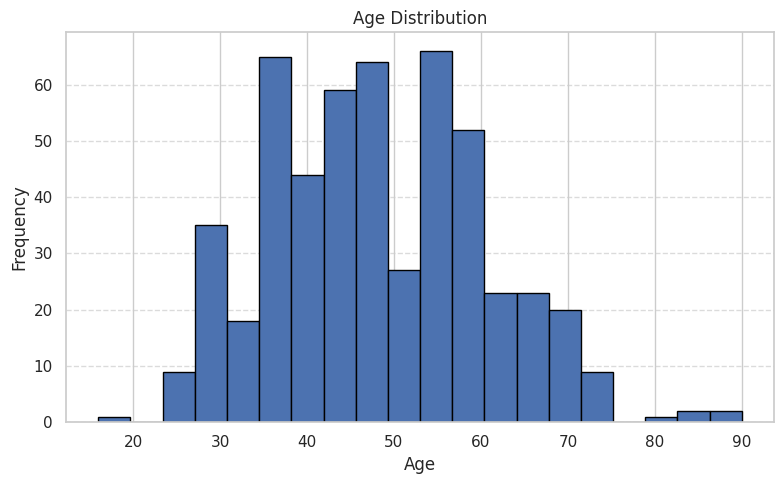

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

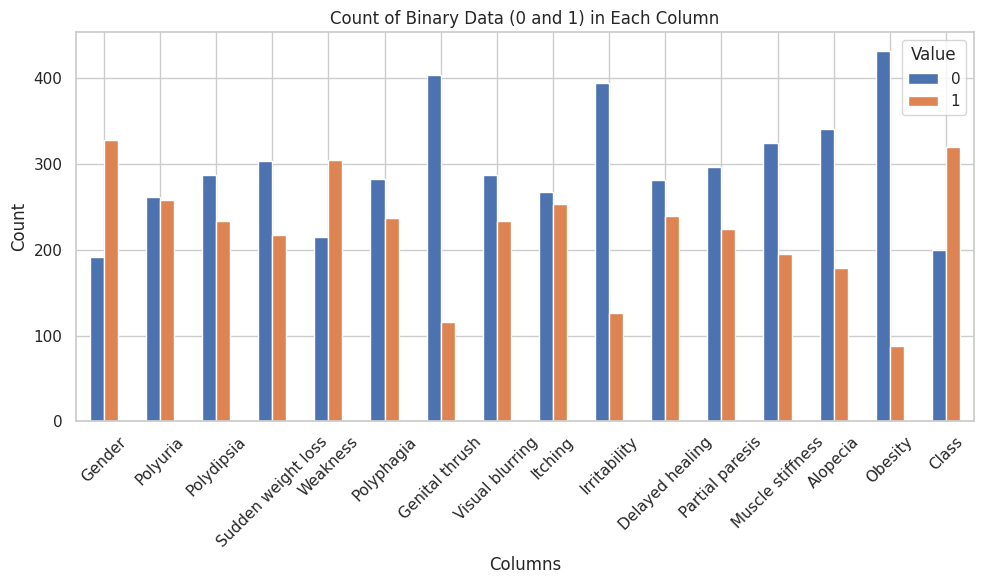

In [ ]:
import matplotlib.pyplot as plt

binary_columns = df.drop(columns=['Age']).columns
binary_counts = df[binary_columns].apply(pd.Series.value_counts).transpose()


# Plot the counts for each binary column
binary_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Binary Data (0 and 1) in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Value', labels=['0', '1'])
plt.tight_layout()
plt.show()

The graph indicates that there are no unrealistic outliers for age. Additionally, the class attribute, which represents whether or not a person has diabetes, does not show extreme bias, making the dataset suitable for use.

# Goals for Data Visualization and Modeling

1. **Identifying Attribute-Based Relationships**  
   - Provide a clear and comprehensive visualization of overall data relationships.  
   
2. **Finding High-Risk Groups**  
   - Visualize clusters of high-risk groups.  
   - Use binning of individual attributes for more granular analysis.  
   - Highlight and visualize potential high-risk attribute combinations for diabetes.  

3. **What-If Analysis**  
   - Create an interactive channel for users to query specific attributes.  
   - Support analysis for all attributes or a subset of attributes.  
   - Return the probability of diabetes risk based on user-defined conditions.

# Steps to Prepare Data for These Goals

1. **Data Cleaning**  
   - Use clean data to train a deep learning model to fill the incorrect data.

2. **Handling Incorrect Values**  
   - Use deep learning models to impute incorrect values.  
   - Visualize the accuracy of our impute-data method.

3. **Feature Selection and Modeling**  
   - Identify high-related attributes.
   - Apply deep learning models to identify high-risk attribute combinations.  
   - Create custom pipelines to support user-defined attribute selection for What-If analysis.
   - Enable user interaction for dynamic risk assessments based on selected attributes.

# 3.1-Data wrangling progress and results

Since only the first dataset is problematic, we'll focus on it here

## Predictive Model to Impute Missing Values

- **Model Training**: A RandomForestRegressor was trained using non-missing values, where temporary median imputation was applied to other columns to maintain data integrity during training.
- **Missing Value Prediction**: The model predicted incorrect values.

## Data Visualization
Visualizations were created to compare the original and processed data:

- **Histograms with KDE**: histograms were plotted before and after data processing.
- **Comparison Plot**: A bar plot was used to compare the count of zero values in the original and filled datasets across all relevant features.

## Results
The complementary values are consistent with the distribution and numerical type.



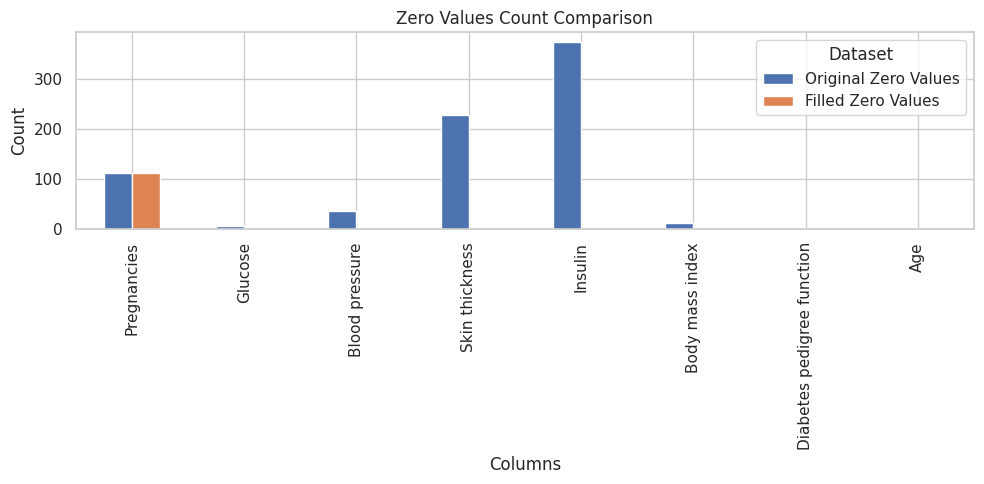

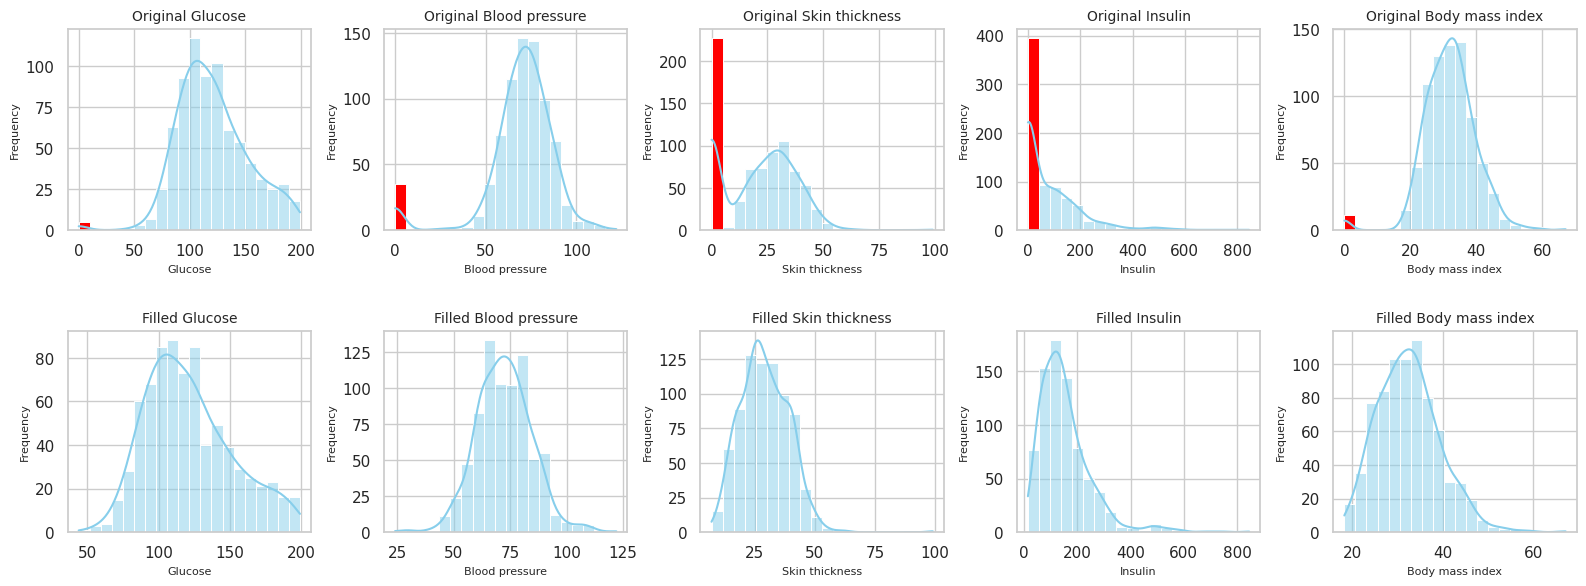

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 1 _ Pima Indians diabetes dataset (PIDD).xlsx'
df = pd.read_excel(file_path)

columns_to_check = ['Glucose', 'Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index']


# Ensure that the fill value matches the original data type
def preserve_dtype(series, data):
    if pd.api.types.is_integer_dtype(series):
        # 对整数类型的列，确保填充值中没有 NaN
        if pd.isna(data).any():
            data = data.fillna(series.median())
        return data.astype(int)
    elif pd.api.types.is_float_dtype(series):
        return data.astype(float)
    else:
        return data
# Temporarily populate other columns with a value of 0 as the median value, only for model training
def fill_zeros_with_median_temp(df, columns):
    temp_df = df.copy()
    for col in columns:
        if col in temp_df.columns:
            median_value = temp_df[col].replace(0, np.nan).median()
            temp_df[col] = preserve_dtype(temp_df[col], temp_df[col].replace(0, np.nan).fillna(median_value))
    return temp_df

# Functions for predicting missing values
def predict_missing_values(df, target_col, other_cols):

    df[target_col] = df[target_col].replace(0, np.nan)

    train_data = df[df[target_col].notna()]
    missing_data = df[df[target_col].isna()]

    if missing_data.empty:
        print(f"No missing values in {target_col}. Skipping.")
        return df

    temp_train_data = fill_zeros_with_median_temp(train_data, other_cols)
    temp_missing_data = fill_zeros_with_median_temp(missing_data, other_cols)

    X_train = temp_train_data[other_cols]
    y_train = temp_train_data[target_col]
    X_missing = temp_missing_data[other_cols]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_missing_scaled = scaler.transform(X_missing)
    # Predictions using random forests
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    predicted_values = model.predict(X_missing_scaled)

    df.loc[df[target_col].isna(), target_col] = preserve_dtype(df[target_col], predicted_values)
    return df

for target_col in columns_to_check:
    other_cols = [col for col in columns_to_check if col != target_col]
    df = predict_missing_values(df, target_col, other_cols)

output_file_path = '/content/drive/My Drive/Colab Notebooks/Filled_Dataset.csv'
df.to_csv(output_file_path, index=False)
import pandas as pd
import matplotlib.pyplot as plt

original_file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 1 _ Pima Indians diabetes dataset (PIDD).xlsx'
filled_file_path = '/content/drive/My Drive/Colab Notebooks/Filled_Dataset.csv'

original_df = pd.read_excel(original_file_path)
filled_df = pd.read_csv(filled_file_path)

columns_to_check = [
    'Pregnancies', 'Glucose', 'Blood pressure', 'Skin thickness',
    'Insulin', 'Body mass index', 'Diabetes pedigree function', 'Age'
]

original_zeros_count = original_df[columns_to_check].isin([0]).sum()
filled_zeros_count = filled_df[columns_to_check].isin([0]).sum()

comparison_df = pd.DataFrame({
    'Original Zero Values': original_zeros_count,
    'Filled Zero Values': filled_zeros_count
})

comparison_df.plot(kind='bar', figsize=(10, 5), title='Zero Values Count Comparison')
plt.ylabel('Count')
plt.xlabel('Columns')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

original_file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 1 _ Pima Indians diabetes dataset (PIDD).xlsx'
filled_file_path = '/content/drive/My Drive/Colab Notebooks/Filled_Dataset.csv'

original_df = pd.read_excel(original_file_path)
filled_df = pd.read_csv(filled_file_path)

columns_to_check1 = ['Glucose', 'Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index']

ncols = 5
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 6))
for i, column in enumerate(columns_to_check1):
    ax = axes[0, i]
    hist = sns.histplot(original_df[column], ax=ax, kde=True, color='skyblue', bins=20)
    for bar in hist.patches:
        if bar.get_x() <= 0 and bar.get_x() + bar.get_width() > 0:
            bar.set_facecolor('red')
    ax.set_title(f'Original {column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

for i, column in enumerate(columns_to_check1):
    ax = axes[1, i]
    hist = sns.histplot(filled_df[column], ax=ax, kde=True, color='skyblue', bins=20)
    for bar in hist.patches:
        if bar.get_x() <= 0 and bar.get_x() + bar.get_width() > 0:
            bar.set_facecolor('red')
    ax.set_title(f'Filled {column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.tight_layout(pad=1.0)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


# 3.2-Data modeling results

Here I have the process and visualization of the model in Dataset 1 _ Pima Indians diabetes dataset (PIDD) and then in Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD) respectively.

### 1. **Decision Tree Analysis**
- **Objective:**  
  - Simulate potential variable combinations leading to diabetes.  
- **Method:**  
  - Utilized **DecisionTreeClassifier** for relationship analysis.  
- **visualization**
  - Generated a **tree-structured visualization** to present combinations potentially causing diabetes.  
  - Clearly categorized and documented the decision process.  



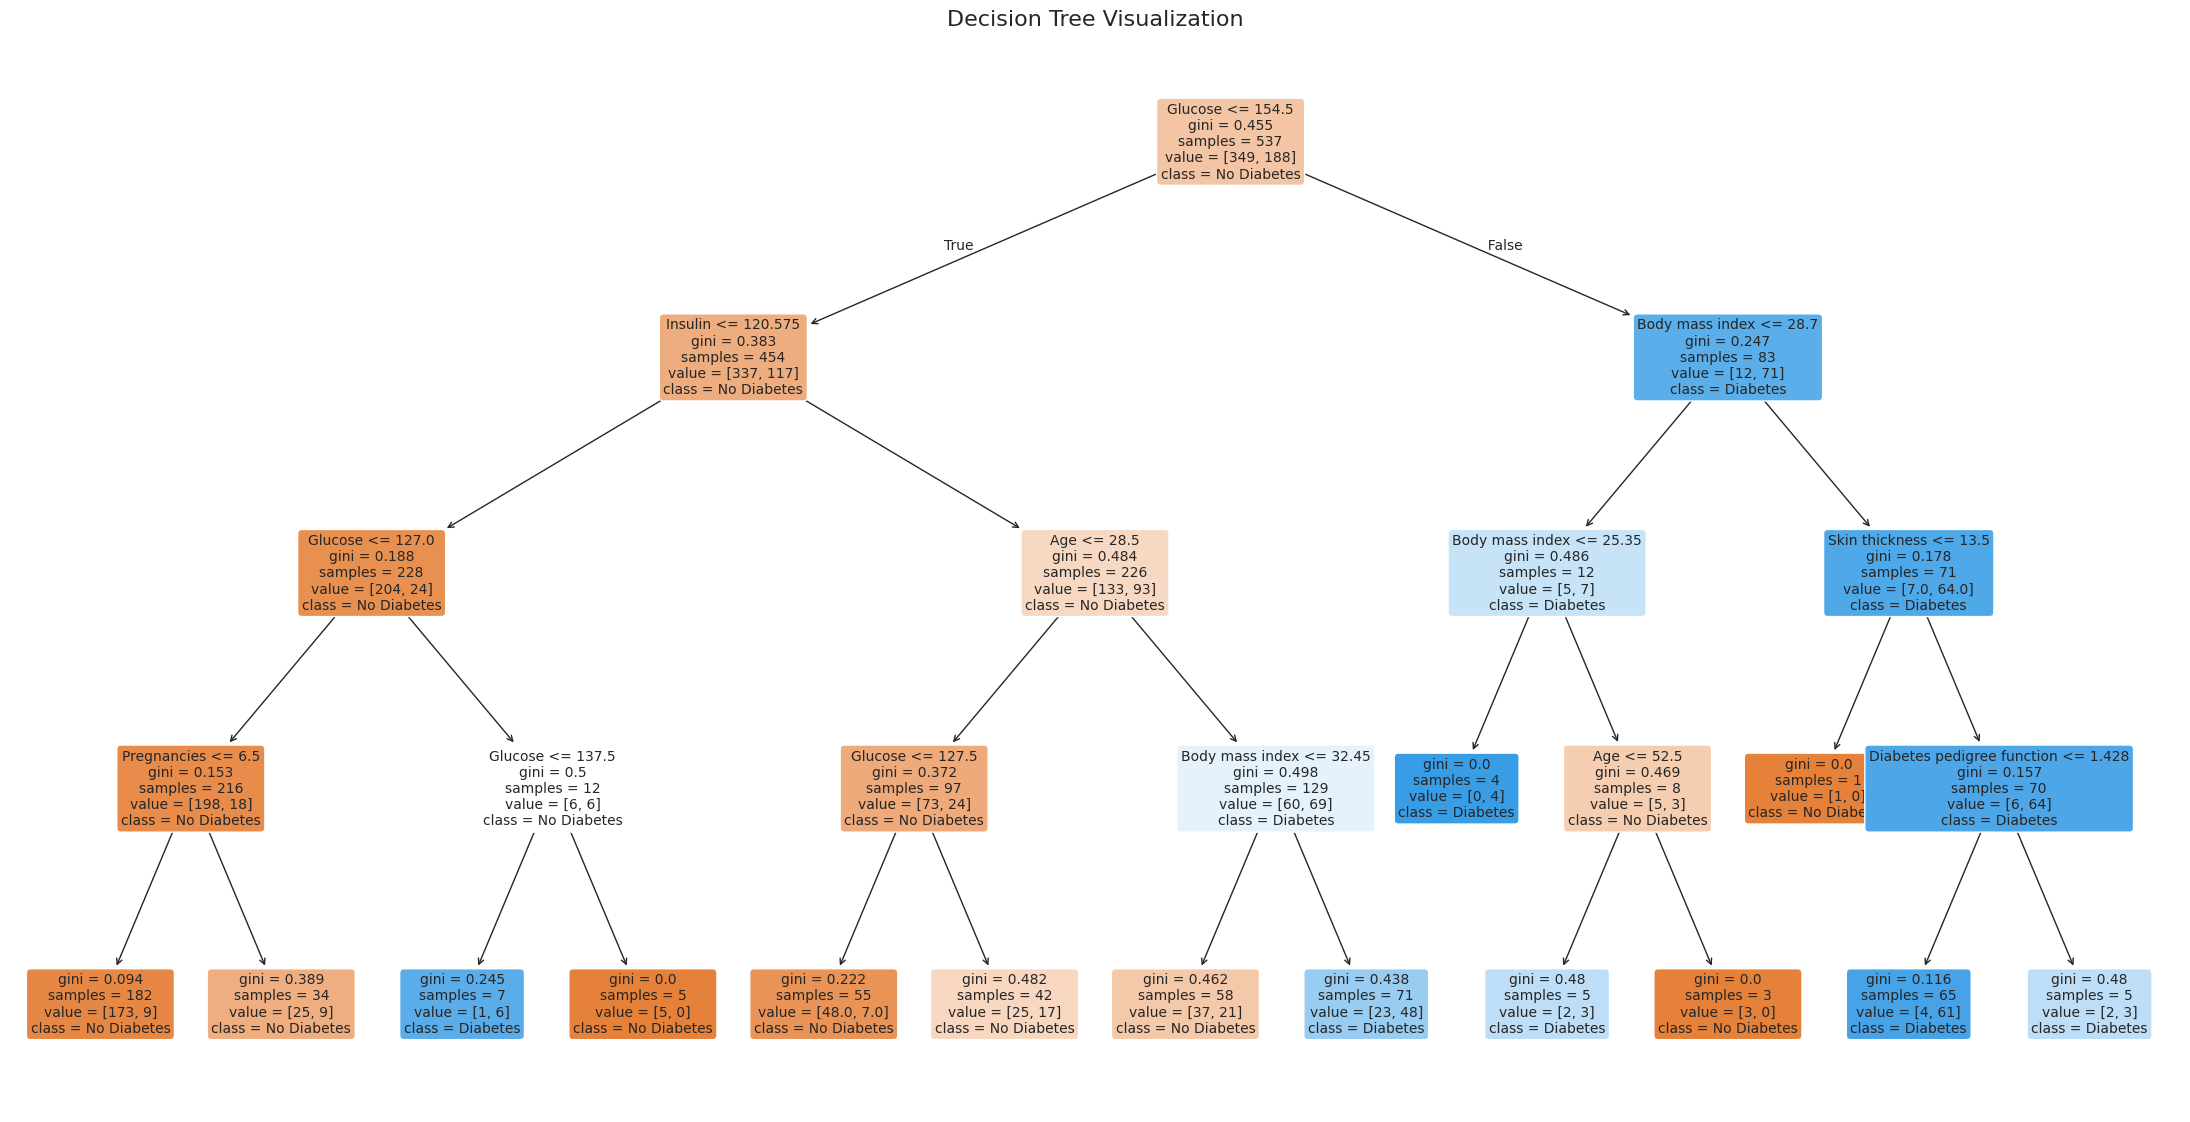

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

filled_file_path = '/content/drive/My Drive/Colab Notebooks/Filled_Dataset.csv'
filled_df = pd.read_csv(filled_file_path)

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=16, random_state=42)
clf.fit(X_train, y_train)
plt.figure(figsize=(28, 14))

plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


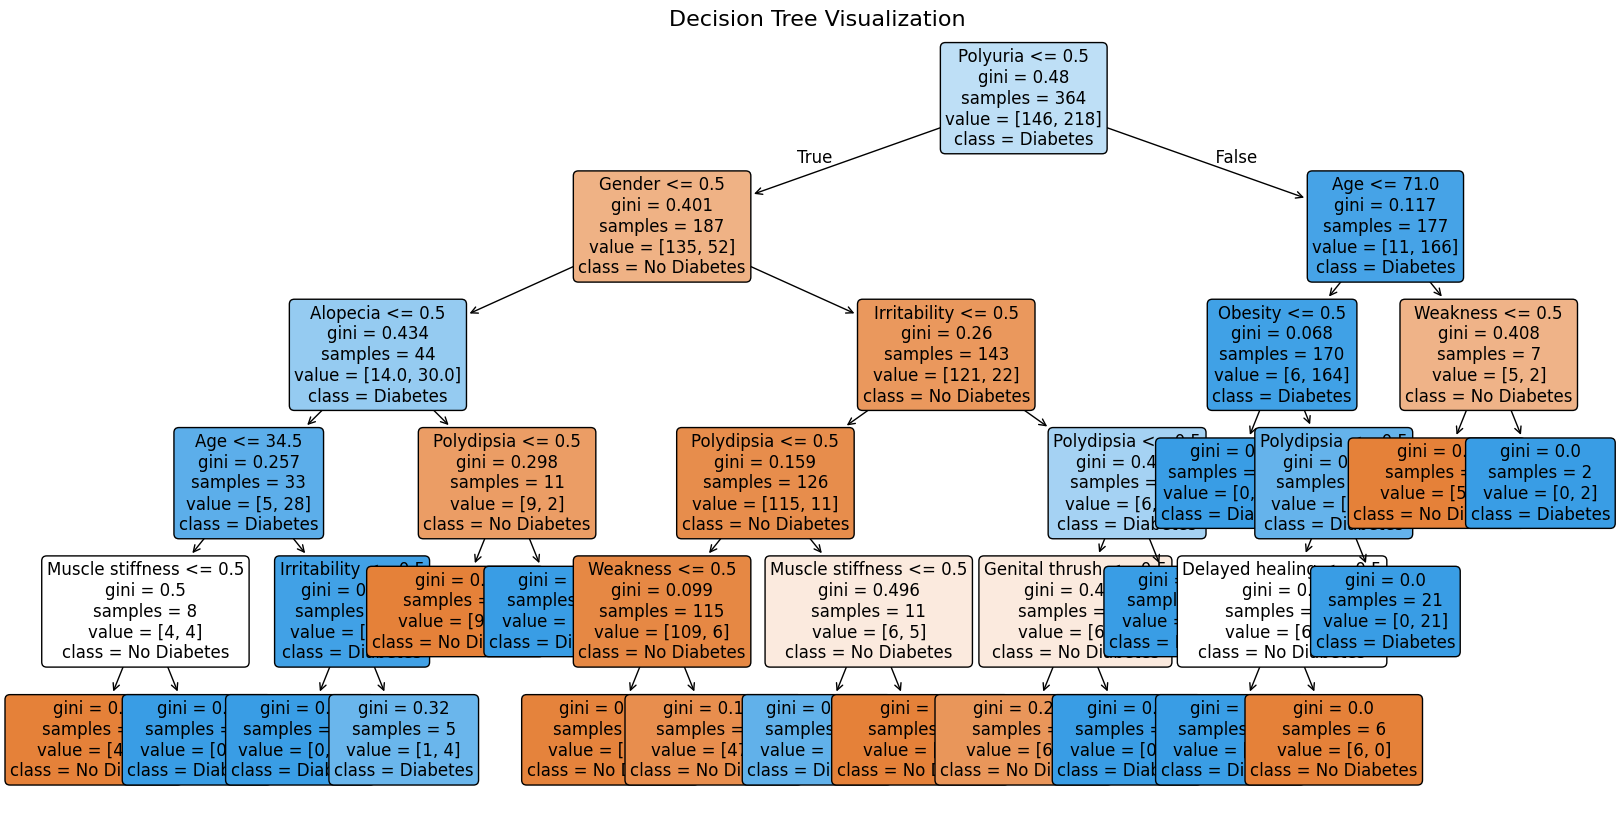

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx'
filled_df = pd.read_excel(file_path)

replace_map = {
    'Gender': {'Male': 1, 'Female': 0},
    'Polyuria': {'Yes': 1, 'No': 0},
    'Polydipsia': {'Yes': 1, 'No': 0},
    'Sudden weight loss': {'Yes': 1, 'No': 0},
    'Weakness': {'Yes': 1, 'No': 0},
    'Polyphagia': {'Yes': 1, 'No': 0},
    'Genital thrush': {'Yes': 1, 'No': 0},
    'Visual blurring': {'Yes': 1, 'No': 0},
    'Itching': {'Yes': 1, 'No': 0},
    'Irritability': {'Yes': 1, 'No': 0},
    'Delayed healing': {'Yes': 1, 'No': 0},
    'Partial paresis': {'Yes': 1, 'No': 0},
    'Muscle stiffness': {'Yes': 1, 'No': 0},
    'Alopecia': {'Yes': 1, 'No': 0},
    'Obesity': {'Yes': 1, 'No': 0}
}

for col, replacements in replace_map.items():
    filled_df[col] = filled_df[col].map(replacements)

X = filled_df.drop(columns=['Class'])
y = filled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

inverse_replace_map = {col: {v: k for k, v in mappings.items()} for col, mappings in replace_map.items()}

def replace_numeric_with_labels(tree_text, feature_names, inverse_replace_map):
    for i, feature in enumerate(feature_names):
        if feature in inverse_replace_map:
            for value, label in inverse_replace_map[feature].items():
                tree_text = tree_text.replace(f'X[{i}] <= {value + 0.5}', f'{feature} is {label}')
                tree_text = tree_text.replace(f'X[{i}] > {value + 0.5}', f'{feature} is not {label}')
    return tree_text

fig, ax = plt.subplots(figsize=(20, 10))
tree_text = plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    fontsize=12,
    ax=ax
)

for artist in ax.get_children():
    if isinstance(artist, plt.Text):
        original_text = artist.get_text()
        modified_text = replace_numeric_with_labels(original_text, X.columns, inverse_replace_map)
        artist.set_text(modified_text)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


### 2. **Mutual Information**

- **Mutual Information Visualization**  
Calculate the Mutual Information scores between each feature and the outcome variable to identify the features that contribute most to predicting the presence of diabetes.

- **Data Binning and Risk Analysis Visualization**  
Visualize the distribution of diabetes cases across different subgroups based on the created bins for each feature. Identify and mark bins with high and low risk for diabetes.



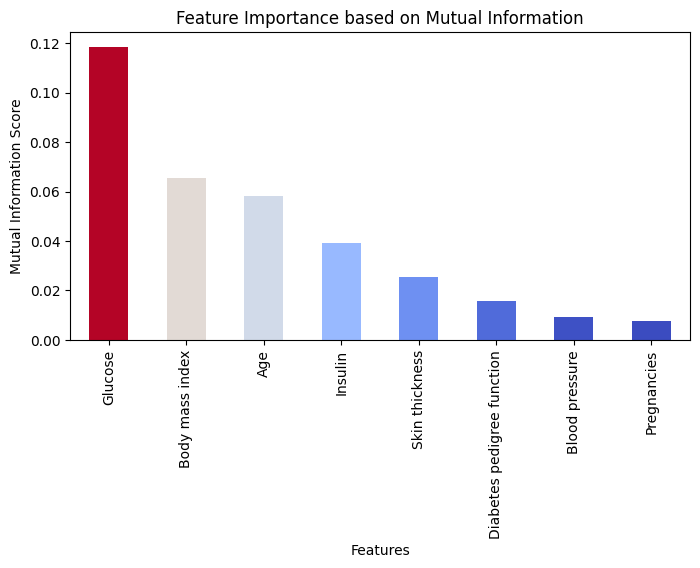

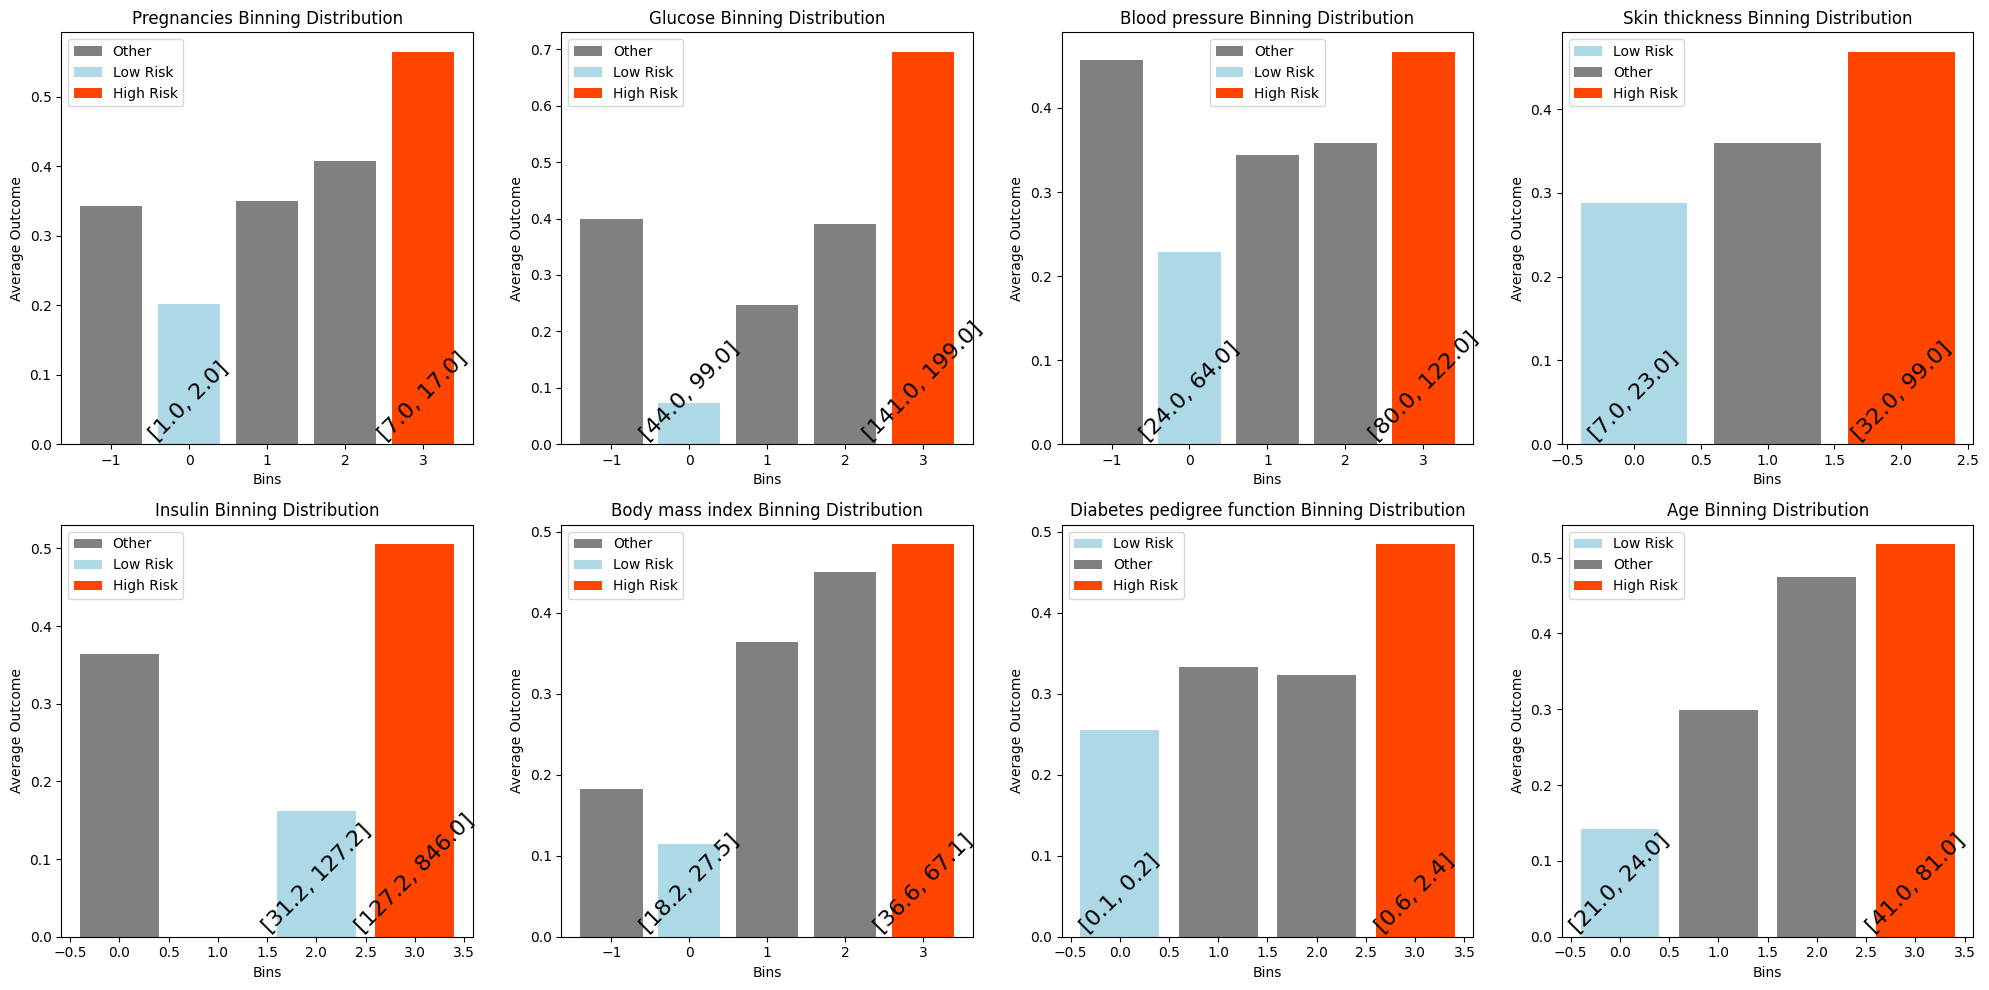

In [ ]:

import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm


filled_file_path = '/content/drive/My Drive/Colab Notebooks/Filled_Dataset.csv'
filled_df = pd.read_csv(filled_file_path)


X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 4))

mi_scores_normalized = (mi_scores - mi_scores.min()) / (mi_scores.max() - mi_scores.min())
colors = cm.coolwarm(mi_scores_normalized)

mi_scores.plot(kind='bar', color=colors, title='Feature Importance based on Mutual Information')
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.show()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df['Skin thickness'] = df['Skin thickness'].replace(0, df['Skin thickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

# bining
def create_bins_with_zeros(feature, bins=4):
    is_zero = (feature == 0)
    non_zero_bins, bin_edges = pd.qcut(feature[~is_zero], q=bins, duplicates='drop', retbins=True, labels=False)
    bins = pd.Series(index=feature.index, dtype='float64')
    bins[is_zero] = -1
    bins[~is_zero] = non_zero_bins
    return bins, bin_edges

def plot_binning_distributions(data, outcome_col='Outcome', bins=4):
    features = data.columns.drop(outcome_col)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if i >= len(axes):
            break

        try:
            data[f'{feature}_bin'], bin_edges = create_bins_with_zeros(data[feature], bins=bins)
            bin_means = data.groupby(f'{feature}_bin')[outcome_col].mean()

            high_risk_bin = bin_means.idxmax()
            low_risk_bin = bin_means.idxmin()

            ax = axes[i]
            for bin_idx, bin_mean in bin_means.items():
                if bin_idx == high_risk_bin:
                    color = '#FF4500'
                    label = 'High Risk' if 'High Risk' not in ax.get_legend_handles_labels()[1] else None
                elif bin_idx == low_risk_bin:
                    color = '#ADD8E6'
                    label = 'Low Risk' if 'Low Risk' not in ax.get_legend_handles_labels()[1] else None
                else:
                    color = 'gray'
                    label = 'Other' if 'Other' not in ax.get_legend_handles_labels()[1] else None

                ax.bar(bin_idx, bin_mean, color=color, label=label)

            ax.set_title(f'{feature} Binning Distribution', fontsize=12)
            ax.set_xlabel('Bins', fontsize=10)
            ax.set_ylabel(f'Average {outcome_col}', fontsize=10)
            ax.legend()

            for bin_idx in range(len(bin_edges) - 1):
                label = f"[{bin_edges[bin_idx]:.1f}, {bin_edges[bin_idx+1]:.1f}]"
                if bin_idx == high_risk_bin:
                    ax.text(bin_idx, 0, label, ha='center', va='bottom', fontsize=16, rotation=45)
                elif bin_idx == low_risk_bin:
                    ax.text(bin_idx, 0, label, ha='center', va='bottom', fontsize=16, rotation=45)

    plt.tight_layout()
    plt.show()

plot_binning_distributions(df, outcome_col='Outcome', bins=4)



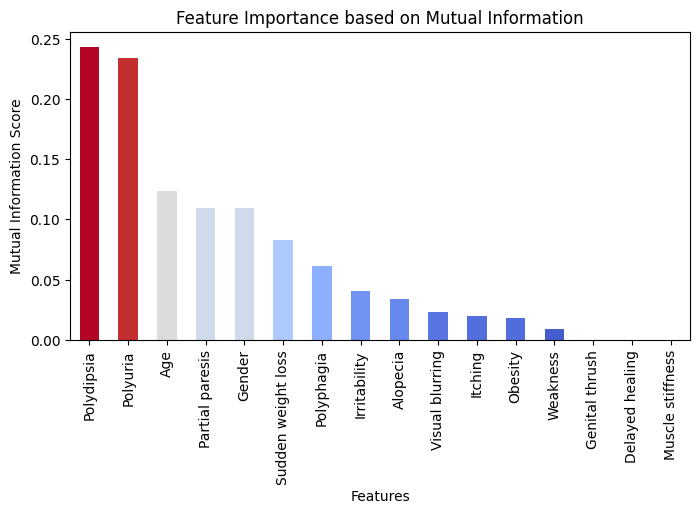

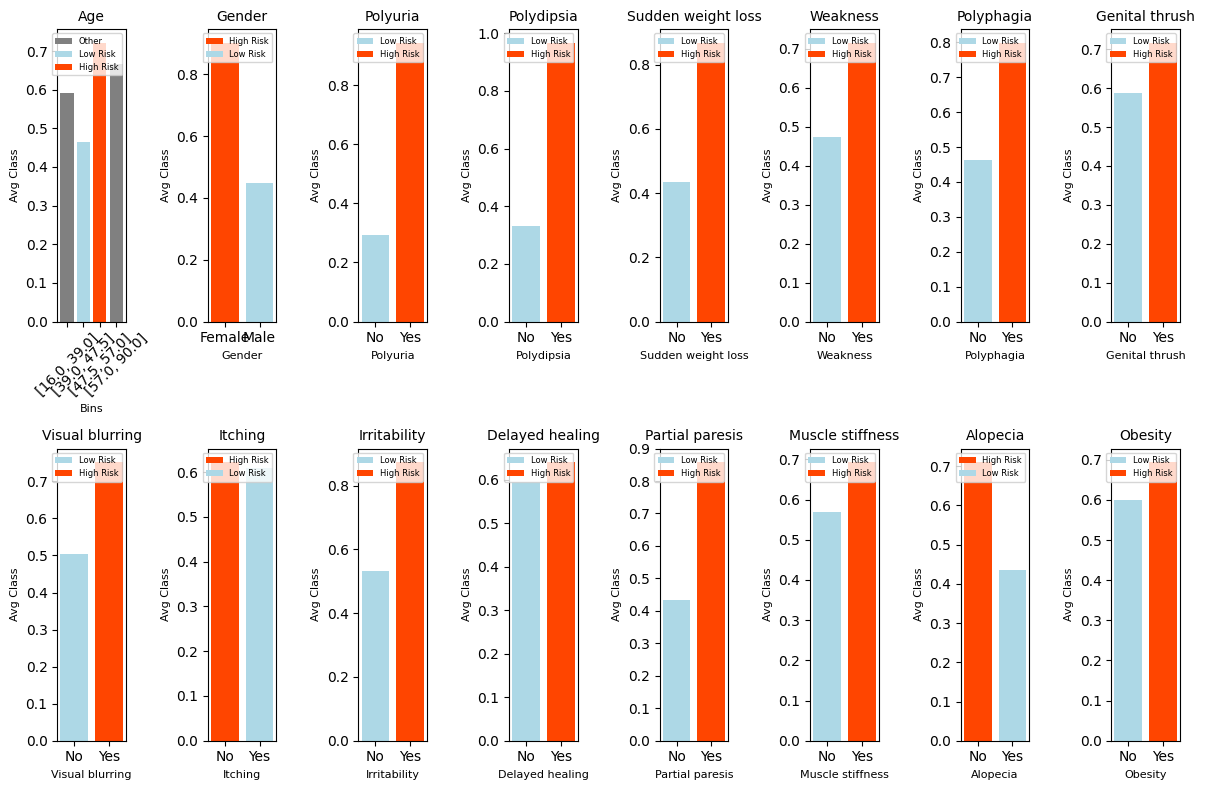

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from matplotlib import cm


file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx'
filled_df = pd.read_excel(file_path)

replace_map = {
    'Gender': {'Male': 1, 'Female': 0},
    'Polyuria': {'Yes': 1, 'No': 0},
    'Polydipsia': {'Yes': 1, 'No': 0},
    'Sudden weight loss': {'Yes': 1, 'No': 0},
    'Weakness': {'Yes': 1, 'No': 0},
    'Polyphagia': {'Yes': 1, 'No': 0},
    'Genital thrush': {'Yes': 1, 'No': 0},
    'Visual blurring': {'Yes': 1, 'No': 0},
    'Itching': {'Yes': 1, 'No': 0},
    'Irritability': {'Yes': 1, 'No': 0},
    'Delayed healing': {'Yes': 1, 'No': 0},
    'Partial paresis': {'Yes': 1, 'No': 0},
    'Muscle stiffness': {'Yes': 1, 'No': 0},
    'Alopecia': {'Yes': 1, 'No': 0},
    'Obesity': {'Yes': 1, 'No': 0},
    'Class': {'Positive': 1, 'Negative': 0}
}

for col, replacements in replace_map.items():
    filled_df[col] = filled_df[col].map(replacements)

X = filled_df.drop(columns=['Class'])
y = filled_df['Class']

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(8, 4))
mi_scores_normalized = (mi_scores - mi_scores.min()) / (mi_scores.max() - mi_scores.min())
colors = cm.coolwarm(mi_scores_normalized)

mi_scores.plot(kind='bar', color=colors, title='Feature Importance based on Mutual Information')
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.show()

def plot_features(data, features, outcome_col='Class', bins=4):
    num_features = len(features)
    n_cols = (num_features + 1) // 2  
    fig, axes = plt.subplots(2, n_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

        if data[feature].nunique() > 2:  # If continuous, use binning
            data[f'{feature}_bin'], bin_edges = pd.qcut(data[feature], q=bins, duplicates='drop', retbins=True, labels=False)
            bin_means = data.groupby(f'{feature}_bin')[outcome_col].mean()

            high_risk_bin = bin_means.idxmax()
            low_risk_bin = bin_means.idxmin()

            for bin_idx, bin_mean in bin_means.items():
                if bin_idx == high_risk_bin:
                    color = '#FF4500'
                    label = 'High Risk'
                elif bin_idx == low_risk_bin:
                    color = '#ADD8E6'
                    label = 'Low Risk'
                else:
                    color = 'gray'
                    label = 'Other'

                ax.bar(bin_idx, bin_mean, color=color, label=label if label not in ax.get_legend_handles_labels()[1] else None)

            ax.set_xticks(range(len(bin_edges) - 1))
            ax.set_xticklabels([f"[{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f}]" for i in range(len(bin_edges) - 1)], rotation=45)
        else:  # If binary, plot averages directly
            means = data.groupby(feature)[outcome_col].mean()
            high_risk = means.idxmax()
            low_risk = means.idxmin()

            for value, mean in means.items():
                if value == high_risk:
                    color = '#FF4500'
                    label = 'High Risk'
                elif value == low_risk:
                    color = '#ADD8E6'
                    label = 'Low Risk'
                else:
                    color = 'gray'
                    label = 'Other'

                ax.bar(value, mean, color=color, label=label if label not in ax.get_legend_handles_labels()[1] else None)
            if feature == 'Gender':
              ax.set_xticks([0, 1])
              ax.set_xticklabels( ['Female', 'Male'])
            else:
              ax.set_xticks([0, 1])
              ax.set_xticklabels(['No', 'Yes'])

        ax.set_title(feature, fontsize=10)
        ax.set_xlabel('Bins' if data[feature].nunique() > 2 else feature, fontsize=8)
        ax.set_ylabel(f'Avg {outcome_col}', fontsize=8)
        ax.legend(fontsize=6)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

all_features = X.columns.tolist()
plot_features(filled_df, all_features, outcome_col='Class', bins=4)

### 3. Model Training and Evaluation Summary

#### **1. Grid Search with XGBoost**
Optimized the XGBoost model for diabetes prediction with effective hyperparameter tuning and performance evaluation. Model saved for future use.

#### **2. Model Performance Evaluation**
** Confusion Matrix Visualization **
- **Heatmap Representation**  

** Accuracy Visualization**
- **Bar Plot**  
  The correctness rate picks up high and can be used

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Training took 7.64 minutes
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.7662337662337663
AUC Score: 0.8319559228650137


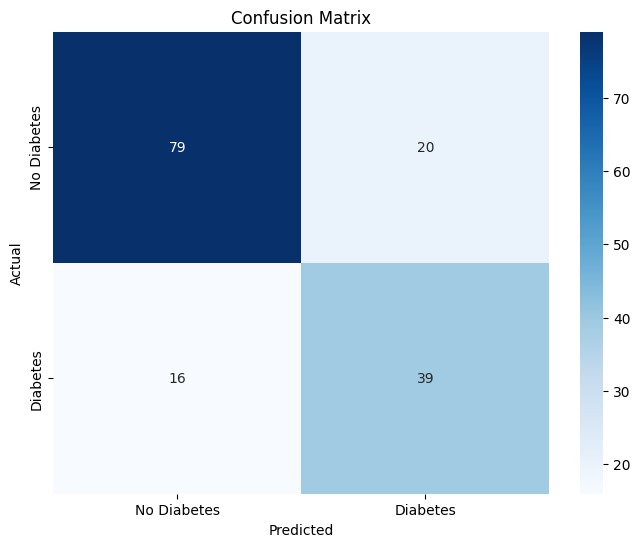

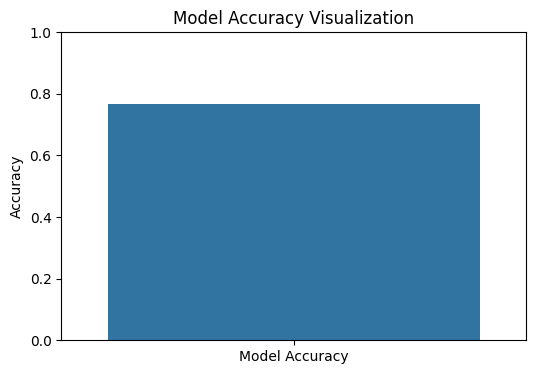

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import joblib 
import time


filled_file_path = '/content/drive/My Drive/Colab Notebooks/Filled_Dataset.csv'
df = pd.read_csv(filled_file_path)

X = df.drop(columns=['Outcome'])
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [300, 500, 700], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [5, 6, 7],  
    'subsample': [0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 0.9]  
}


start_time = time.time()

xgb_model = XGBClassifier(missing=np.nan, random_state=42, tree_method='gpu_hist')

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Training took {elapsed_time/60:.2f} minutes")

best_model = grid_search.best_estimator_
joblib.dump(best_model, '/content/drive/My Drive/Colab Notebooks/best_xgb_model1.pkl')  # 保存模型

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.barplot(x=['Model Accuracy'], y=[accuracy])
plt.title('Model Accuracy Visualization')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training took 0.20 minutes
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Accuracy: 0.9711538461538461
AUC Score: 1.0


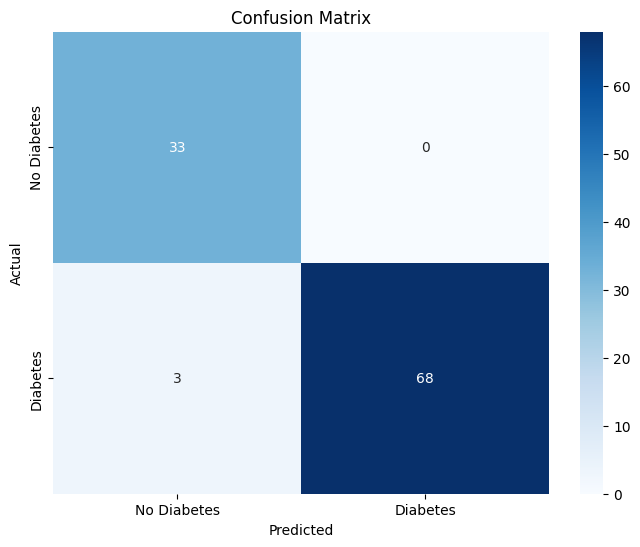

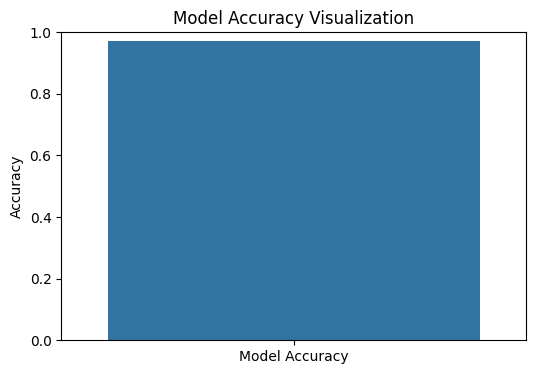

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

file_path = '/content/drive/My Drive/Colab Notebooks/Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx'
filled_df = pd.read_excel(file_path)

# Map categorical values to numerical values
replace_map = {
    'Gender': {'Male': 1, 'Female': 0},
    'Polyuria': {'Yes': 1, 'No': 0},
    'Polydipsia': {'Yes': 1, 'No': 0},
    'Sudden weight loss': {'Yes': 1, 'No': 0},
    'Weakness': {'Yes': 1, 'No': 0},
    'Polyphagia': {'Yes': 1, 'No': 0},
    'Genital thrush': {'Yes': 1, 'No': 0},
    'Visual blurring': {'Yes': 1, 'No': 0},
    'Itching': {'Yes': 1, 'No': 0},
    'Irritability': {'Yes': 1, 'No': 0},
    'Delayed healing': {'Yes': 1, 'No': 0},
    'Partial paresis': {'Yes': 1, 'No': 0},
    'Muscle stiffness': {'Yes': 1, 'No': 0},
    'Alopecia': {'Yes': 1, 'No': 0},
    'Obesity': {'Yes': 1, 'No': 0},
    'Class': {'Positive': 1, 'Negative': 0}  
}

for col, replacements in replace_map.items():
    filled_df[col] = filled_df[col].map(replacements)

X = filled_df.drop(columns=['Class'])
y = filled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [300, 500],  
    'learning_rate': [0.05, 0.1], 
    'max_depth': [5, 6],  
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8]  
}


start_time = time.time()

xgb_model = XGBClassifier(missing=np.nan, random_state=42, tree_method='hist')

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Training took {elapsed_time / 60:.2f} minutes")

best_model = grid_search.best_estimator_
joblib.dump(best_model, '/content/drive/My Drive/Colab Notebooks/best_xgb_model.pkl')  # Save the model

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.barplot(x=['Model Accuracy'], y=[accuracy])
plt.title('Model Accuracy Visualization')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


### 4.Predictive Features and User Interaction

#### **1. Individual Prediction**
- **Personalized Risk Assessment**:  
Users can input individual values for each health indicator (e.g., glucose levels, BMI) to receive a tailored diabetes risk prediction.

#### **2. What-If Analysis**
- **Risk Exploration by Bins**:  
Users can select different bins (ranges) for key features to explore how changes in these metrics impact their predicted diabetes risk.  


Predicted probability of diabetes: 0.6165


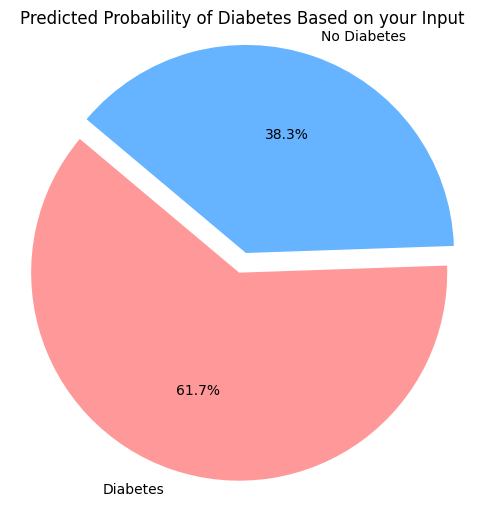

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt

best_model = joblib.load('/content/drive/My Drive/Colab Notebooks/best_xgb_model1.pkl')

partial_features = {
    'Glucose': [120],
    'Blood pressure': [70],
    # some 'Skin thickness'  'Insulin' ... are missing
    'Body mass index': [28.1],
}

all_features = ['Pregnancies', 'Glucose', 'Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index', 'Diabetes pedigree function', 'Age']
partial_data = pd.DataFrame(partial_features, columns=all_features)

imputer = SimpleImputer(strategy='mean')

for column in all_features:
    if column not in partial_data.columns or partial_data[column].isna().all():
        imputed_value = imputer.fit_transform(df[[column]])[0, 0]  
        partial_data[column] = [imputed_value] 
pred_proba = best_model.predict_proba(partial_data)[:, 1][0]  


print(f"Predicted probability of diabetes: {pred_proba:.4f}")

labels = ['Diabetes', 'No Diabetes']
sizes = [pred_proba, 1 - pred_proba] 
colors = ['#FF9999', '#66B3FF']
explode = (0.1, 0) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Predicted Probability of Diabetes Based on your Input')
plt.axis('equal')  
plt.show()


Average Predicted Probability of Diabetes: 0.7559


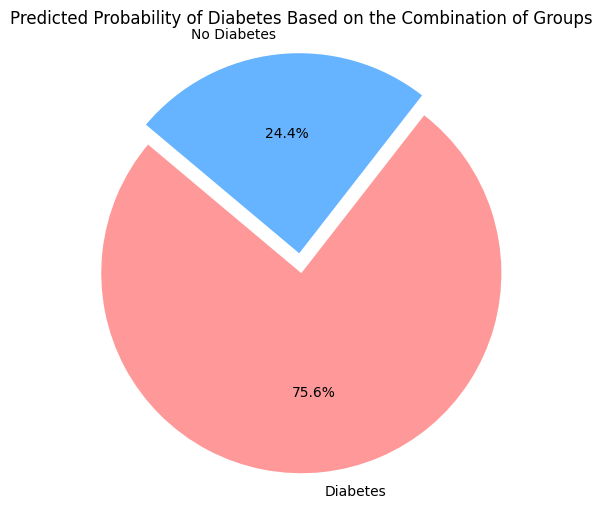

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt

best_model = joblib.load('/content/drive/My Drive/Colab Notebooks/best_xgb_model1.pkl')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Filled_Dataset.csv')

if 'Outcome' in df.columns:
    mean_values = df.drop(columns='Outcome').mean()
else:
    mean_values = df.mean()

feature_ranges = {
    'Glucose': (180, 300), 
    'Insulin': (10, 20)
}

def generate_data(feature_ranges, base_values, num_samples=100):
    baseline_data = pd.DataFrame([base_values], index=np.arange(num_samples))

    for feature, (start, end) in feature_ranges.items():
        baseline_data[feature] = np.linspace(start, end, num_samples)

    return baseline_data


baseline_df = generate_data(feature_ranges, mean_values)


predicted_probabilities = best_model.predict_proba(baseline_df)[:, 1]
average_probability = np.mean(predicted_probabilities)

print(f"Average Predicted Probability of Diabetes: {average_probability:.4f}")

labels = ['Diabetes', 'No Diabetes']
sizes = [average_probability, 1 - average_probability]  
colors = ['#FF9999', '#66B3FF']
explode = (0.1, 0) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Predicted Probability of Diabetes Based on the Combination of Groups')
plt.axis('equal')  
plt.show()



# 4-Reflection

Data predictions were filled back in (using a random forest model), preserving key patterns in the dataset. Feature selection and XGBoost optimized model performance, and the combination of subbins and tree visualization supported my task with a balance between accuracy (76.62%) and interpretability. In terms of visualization, interactive tools such as dashboards allow users to better explore “what-if” scenarios and dynamically view personalized predictions using our model. This will strengthen the user-centered aspect of analytics, providing actionable insights while improving engagement and understanding.

However, some improvements could enhance the workflow. For example, integrating advanced feature engineering techniques such as interaction terms or domain-specific transformations may improve prediction accuracy. In addition, integrating ensemble modeling or deep learning methods may capture complex nonlinear relationships.

